## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID. Add lines as needed for your group size, and make sure each ID is listed on a separate line. 

**Yuanhao Zhu** A13626824

**Jinwei Ren** A92061199

**Yijie Fan** A13485989

**Bolin Yang** A92111272

**Mu He** A13361247

**Xuan Zhang** A14173638

## Import necessary libraries

In [35]:
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import ttest_ind, chisquare, normaltest

## Preprocess the data

In [36]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

In [37]:
df_sample['SalePrice'] = df_sample['SalePrice'].round(0).astype(int)
df_test['SalePrice'] = df_sample['SalePrice']
df = df_train.append(df_test)
df = df.set_index('Id')

In [38]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


Data cleaning: For this part, we don't need the columns such as Lot, Root, Basement, etc. So we drop these columns.  

In [39]:
df = df.drop(['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley', 'LotShape','LandContour','Utilities','LotConfig','LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd','MasVnrType', 'MasVnrArea', 'RoofStyle'], axis = 1 )

In [40]:
df

,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,CollgCr,Norm,Norm,2Story,7,5,2003,2003,Gd,TA,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,Veenker,Feedr,Norm,1Story,6,8,1976,1976,TA,TA,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,CollgCr,Norm,Norm,2Story,7,5,2001,2002,Gd,TA,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,Crawfor,Norm,Norm,2Story,7,5,1915,1970,TA,TA,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,NoRidge,Norm,Norm,2Story,8,5,2000,2000,Gd,TA,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,Mitchel,Norm,Norm,1.5Fin,5,5,1993,1995,TA,TA,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,Somerst,Norm,Norm,1Story,8,5,2004,2005,Gd,TA,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,NWAmes,PosN,Norm,2Story,7,6,1973,1973,TA,TA,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,OldTown,Artery,Norm,1.5Fin,7,5,1931,1950,TA,TA,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


Now we create a new column called PricePerSquare which denotes the price per area. 

In [41]:
df['PricePerSquare'] = df['SalePrice']/df['GrLivArea']

In [42]:
df

,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerSquare
Id,,,,,,,,,,,,,,,,,,,,,
1,CollgCr,Norm,Norm,2Story,7,5,2003,2003,Gd,TA,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,121.929825
2,Veenker,Feedr,Norm,1Story,6,8,1976,1976,TA,TA,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,143.819334
3,CollgCr,Norm,Norm,2Story,7,5,2001,2002,Gd,TA,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,125.139978
4,Crawfor,Norm,Norm,2Story,7,5,1915,1970,TA,TA,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,81.537566
5,NoRidge,Norm,Norm,2Story,8,5,2000,2000,Gd,TA,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,113.739763
6,Mitchel,Norm,Norm,1.5Fin,5,5,1993,1995,TA,TA,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,104.992658
7,Somerst,Norm,Norm,1Story,8,5,2004,2005,Gd,TA,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,181.227863
8,NWAmes,PosN,Norm,2Story,7,6,1973,1973,TA,TA,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,95.693780
9,OldTown,Artery,Norm,1.5Fin,7,5,1931,1950,TA,TA,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,73.224352


Quality and price

Our goal here is to analyze whether housing quality has a strong correlation to housing prices. To do so, we use linear regression to plot a graph with housing quality and housing prices.

In [45]:
df_QP['price']= df['PricePerSquare']
df_QP['quality'] = df['OverallQual'] 
outcome, predictors = patsy.dmatrices('price~quality', df_QP)
mod = sm.OLS(outcome, predictors)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           4.97e-13
Time:                        14:29:35   Log-Likelihood:                -14480.
No. Observations:                2919   AIC:                         2.896e+04
Df Residuals:                    2917   BIC:                         2.898e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    145.9313      2.835     51.483      0.0

By the R-squared and p- value shown above, we can conclude that the relationship between quality and price is strong, let's plot the data so that we can visualize data.

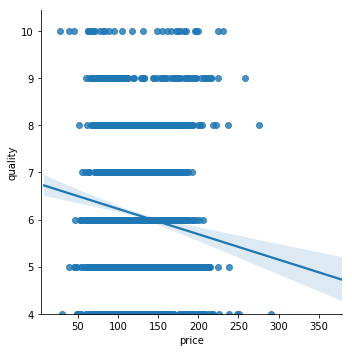

In [46]:
fig=sns.lmplot(x='price',y='quality',data=df_QP,fit_reg=True) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()